# CAPSTONE PROJECT- 4 :- PRCP-1016-Heart DieseasePred

## PROJECT TEAM ID :- PTID-CDS-APR-24-1899

## AIM

#### Task 1:-Prepare a complete data analysis report on the given data.
#### Task 2:- Create a model predicting potential Heart Diseases in people using
#### Machine Learning algorithms.
#### Task3:-Suggestions to the Hospital to awake the predictions of heart diseases
#### prevent life threats.

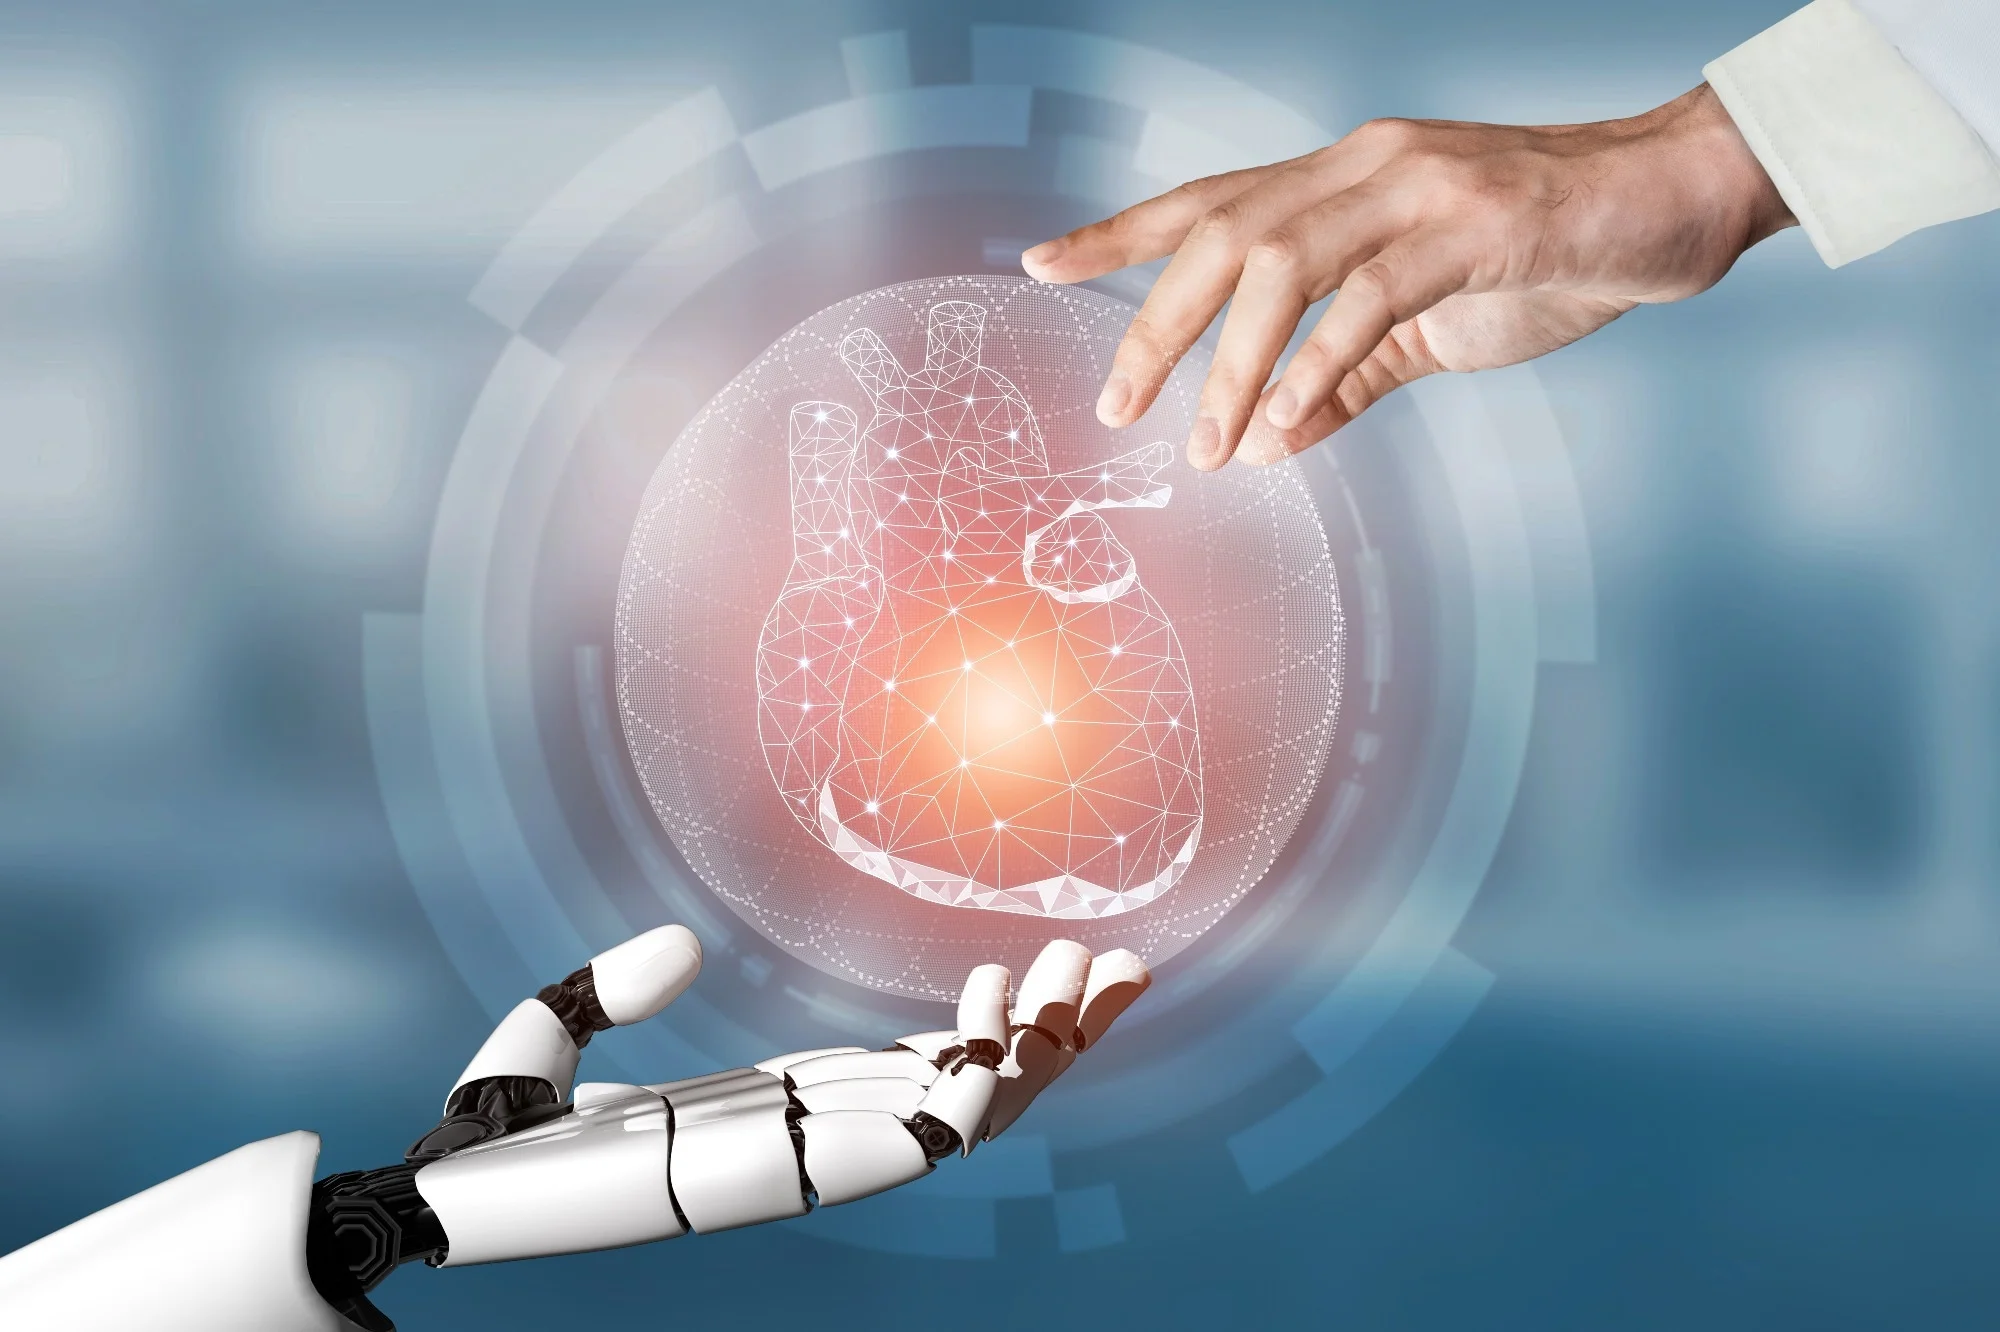

In [64]:
pwd

'C:\\Users\\dell'

## I. Importing essential libraries

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [75]:
data=pd.read_csv('values.csv') 
print(data)

    patient_id  slope_of_peak_exercise_st_segment               thal  \
0       0z64un                                  1             normal   
1       ryoo3j                                  2             normal   
2       yt1s1x                                  1             normal   
3       l2xjde                                  1  reversible_defect   
4       oyt4ek                                  3  reversible_defect   
..         ...                                ...                ...   
175     5qfar3                                  2  reversible_defect   
176     2s2b1f                                  2             normal   
177     nsd00i                                  2  reversible_defect   
178     0xw93k                                  1             normal   
179     2nx10r                                  1             normal   

     resting_blood_pressure  chest_pain_type  num_major_vessels  \
0                       128                2                  0   
1

## Verifying it as a 'dataframe' object in pandas

In [76]:
type(data)

pandas.core.frame.DataFrame

## Shape of dataset

In [78]:
data.shape

(180, 14)

## Printing out a few columns¶

In [83]:
data.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [82]:
data.sample(5)

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
101,9f92et,2,normal,140,2,0,0,2,294,1.3,0,56,153,0
104,wokyol,1,reversible_defect,140,3,0,0,0,313,0.2,0,64,133,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
11,xc17yq,1,normal,140,4,0,0,0,226,0.0,1,42,178,0
152,nfag5b,2,reversible_defect,120,4,0,0,0,198,1.6,1,35,130,1


#### Description

In [84]:
data.describe()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000


In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient_id                            180 non-null    object 
 1   slope_of_peak_exercise_st_segment     180 non-null    int64  
 2   thal                                  180 non-null    object 
 3   resting_blood_pressure                180 non-null    int64  
 4   chest_pain_type                       180 non-null    int64  
 5   num_major_vessels                     180 non-null    int64  
 6   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 7   resting_ekg_results                   180 non-null    int64  
 8   serum_cholesterol_mg_per_dl           180 non-null    int64  
 9   oldpeak_eq_st_depression              180 non-null    float64
 10  sex                                   180 non-null    int64  
 11  age                

In [ ]:
###Luckily, we have no missing values

In [103]:
### dropping unwanted columns:
data = data.drop(['patient_id','thal'],axis=1)
print(data)

     slope_of_peak_exercise_st_segment  resting_blood_pressure  \
0                                    1                     128   
1                                    2                     110   
2                                    1                     125   
3                                    1                     152   
4                                    3                     178   
..                                 ...                     ...   
175                                  2                     125   
176                                  2                     180   
177                                  2                     125   
178                                  1                     124   
179                                  1                     160   

     chest_pain_type  num_major_vessels  fasting_blood_sugar_gt_120_mg_per_dl  \
0                  2                  0                                     0   
1                  3                  0      

#### Let's understand our columns better:

In [107]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy"]
for i in range(len(info)):
    print(data.columns[i]+":\t\t\t"+info[i])

slope_of_peak_exercise_st_segment:			age
resting_blood_pressure:			1: male, 0: female
chest_pain_type:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
num_major_vessels:			resting blood pressure
fasting_blood_sugar_gt_120_mg_per_dl:			 serum cholestoral in mg/dl
resting_ekg_results:			fasting blood sugar > 120 mg/dl
serum_cholesterol_mg_per_dl:			resting electrocardiographic results (values 0,1,2)
oldpeak_eq_st_depression:			 maximum heart rate achieved
sex:			exercise induced angina
age:			oldpeak = ST depression induced by exercise relative to rest
max_heart_rate_achieved:			the slope of the peak exercise ST segment
exercise_induced_angina:			number of major vessels (0-3) colored by flourosopy


#### Analysing the 'target' variable¶

In [108]:
data["exercise_induced_angina"].describe()

count    180.000000
mean       0.316667
std        0.466474
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: exercise_induced_angina, dtype: float64

In [109]:
data['exercise_induced_angina'].unique()

array([0, 1], dtype=int64)

#### Clearly, this is a classification problem, with the target variable having values '0' and '1'

### Checking correlation between columns¶

In [110]:
print(data.corr()["exercise_induced_angina"].abs().sort_values(ascending=False))

exercise_induced_angina                 1.000000
max_heart_rate_achieved                 0.365065
chest_pain_type                         0.346266
sex                                     0.251096
oldpeak_eq_st_depression                0.249167
slope_of_peak_exercise_st_segment       0.225459
num_major_vessels                       0.153407
resting_blood_pressure                  0.123397
serum_cholesterol_mg_per_dl             0.083139
age                                     0.081811
resting_ekg_results                     0.037773
fasting_blood_sugar_gt_120_mg_per_dl    0.005956
Name: exercise_induced_angina, dtype: float64


In [ ]:
#This shows that most columns are moderately correlated with target, but 'fasting_blood_sugar_gt_120_mg_per_dl','resting_ekg_results','age','serum_cholesterol_mg_per_dl' is very weakly correlated.

### Exploratory Data Analysis (EDA)
#### First, analysing the target variable:

exercise_induced_angina
0    123
1     57
Name: count, dtype: int64


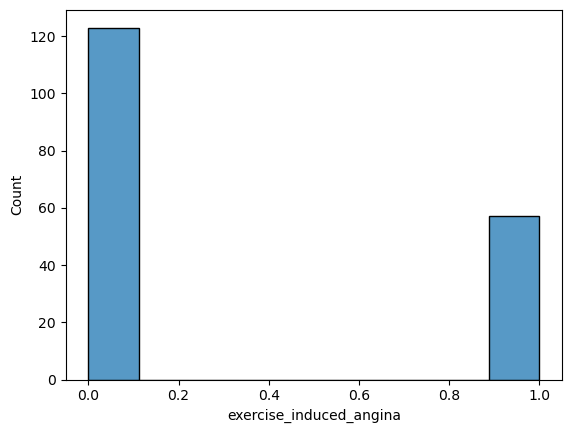

In [113]:
y = data["exercise_induced_angina"]

sns.histplot(y)


exercise_induced_angina_temp = data.exercise_induced_angina.value_counts()

print(exercise_induced_angina_temp)

#### We'll analyse 'sex', 'max_heart_rate_achieved', 'chest_pain_type', 'resting_blood_pressure',  and 'age' features

### Analysing the 'Sex' feature

In [124]:
data["age"].unique()

array([45, 54, 77, 40, 59, 42, 60, 57, 50, 66, 64, 38, 29, 58, 71, 52, 67,
       70, 68, 51, 41, 65, 53, 48, 62, 74, 61, 63, 46, 43, 56, 44, 35, 55,
       49, 47, 37, 69, 39, 34], dtype=int64)

#### We notice, that as expected, the 'sex' feature has 2 unique features

<Axes: xlabel='age', ylabel='Count'>

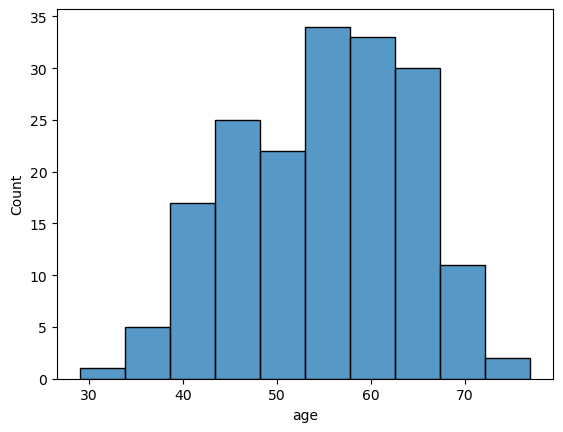

In [127]:
sns.histplot(data['age'])

<Axes: xlabel='sex', ylabel='Count'>

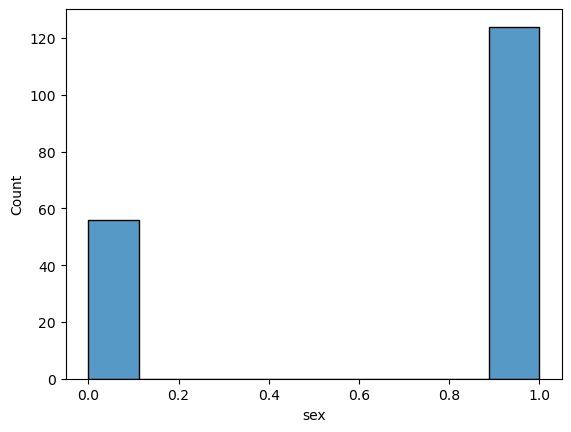

In [128]:
sns.histplot(data['sex'])

#### we analyse that men have more heart attack compared to female

#### Analysing the 'Chest Pain Type' feature¶

In [129]:
data["chest_pain_type"].unique()

array([2, 3, 4, 1], dtype=int64)

<Axes: xlabel='chest_pain_type', ylabel='Count'>

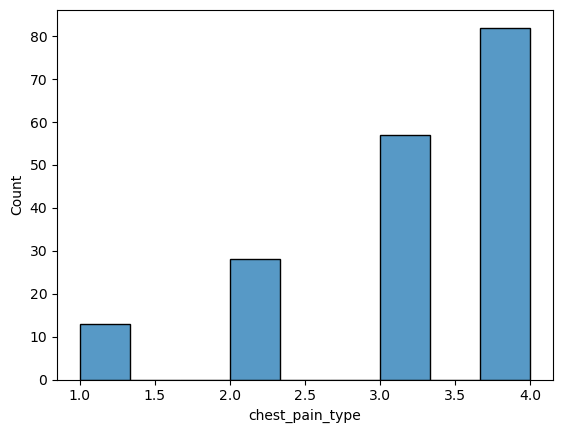

In [130]:
sns.histplot(data['chest_pain_type'])

##### We notice, that chest pain of '1', i.e. the ones with typical angina are much less likely to have heart proble

#### Analysing the resting_blood_pressure feature

In [131]:
data["resting_blood_pressure"].describe()

count    180.000000
mean     131.311111
std       17.010443
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      180.000000
Name: resting_blood_pressure, dtype: float64

In [132]:
data["resting_blood_pressure"].unique()

array([128, 110, 125, 152, 178, 130, 150, 170, 120, 140, 138, 144, 136,
       160, 108, 106, 156, 180, 112, 122, 124, 135, 105, 115, 126, 172,
       145, 118, 134, 100, 155, 132, 102,  94, 117, 142], dtype=int64)

<Axes: xlabel='resting_blood_pressure', ylabel='Count'>

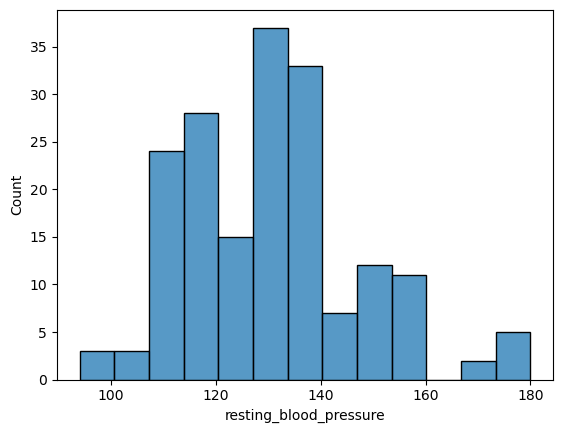

In [137]:
sns.histplot(data["resting_blood_pressure"])

#### Analysing the max_heart_rate_achieved feature


In [138]:
data["max_heart_rate_achieved"].unique()

array([170, 158, 162, 181, 145, 150, 157, 112, 140, 151, 178, 152, 182,
       126, 175, 144, 202, 147, 142, 138, 143, 115, 159, 184, 155, 123,
       168, 114, 154, 165, 186, 173, 163, 121, 161, 137, 172, 130, 167,
       141, 166, 125, 103, 120, 132, 169, 179,  99, 177, 160, 156, 109,
       139, 134, 113, 149, 174, 131, 148, 153, 133, 122, 105, 106, 192,
       108,  96, 171, 180, 188, 111,  97, 117], dtype=int64)

<Axes: xlabel='max_heart_rate_achieved', ylabel='Count'>

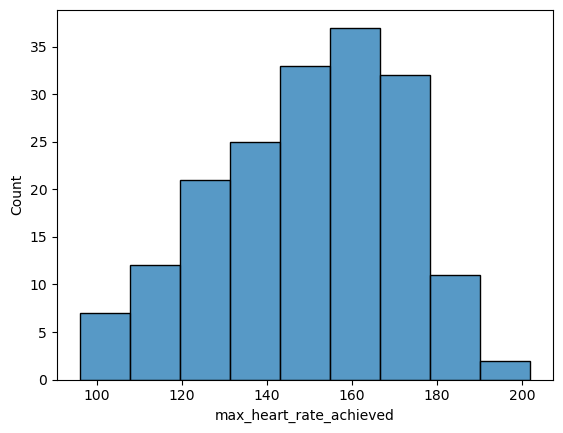

In [142]:
sns.histplot(data["max_heart_rate_achieved"])

### Train Test split¶

In [143]:
from sklearn.model_selection import train_test_split

predictors = data.drop("exercise_induced_angina",axis=1)
exercise_induced_angina = data["exercise_induced_angina"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,exercise_induced_angina,test_size=0.20,random_state=0)

In [144]:
X_train.shape

(144, 11)

In [145]:
X_test.shape

(36, 11)

In [146]:
Y_train.shape

(144,)

In [147]:
Y_test.shape

(36,)

### Model Fitting

In [148]:
from sklearn.metrics import accuracy_score

### Logistic Regression

In [149]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [150]:
Y_pred_lr.shape

(36,)

In [151]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 77.78 %


## SVM

In [155]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [156]:
Y_pred_svm.shape

(36,)

In [157]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 83.33 %


## Decision Tree

In [158]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [159]:
print(Y_pred_dt.shape)

(36,)


In [160]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 77.78 %


## Random Forest

In [167]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [168]:
Y_pred_rf.shape

(36,)

In [169]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 86.11 %


## XGBoost

In [170]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)

In [171]:
Y_pred_xgb.shape

(36,)

In [166]:
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 75.0 %


## Output final score

In [194]:
scores = [score_lr,score_svm,score_dt,score_rf,score_xgb]
algorithms = ["Logistic Regression","Support Vector Machine","Decision Tree","Random Forest","XGBoost"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 77.78 %
The accuracy score achieved using Support Vector Machine is: 83.33 %
The accuracy score achieved using Decision Tree is: 77.78 %
The accuracy score achieved using Random Forest is: 86.11 %
The accuracy score achieved using XGBoost is: 75.0 %


 ## Random forest has good result as compare to other algorithms

In [2]:
# Completed heart disesaes project